In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('laptops.csv')

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
df

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [5]:
df1 = df[['ram',
'storage',
'screen',
'final_price']]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='final_price', ylabel='Count'>

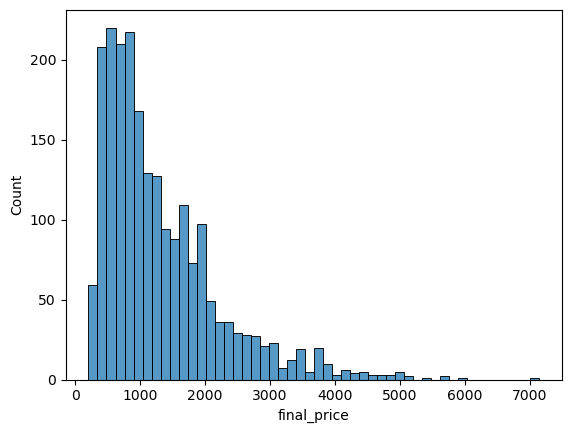

In [7]:
sns.histplot(df1.final_price,bins=50)

# Question 1

In [8]:
df1.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

# Question 2

In [9]:
df1.ram.median()

16.0

# Question 3

In [10]:
n = len(df1)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df1.iloc[idx[:n_train]]
df_val = df1.iloc[idx[n_train:n_val+n_train]]
df_test = df1.iloc[n_val+n_train:]


In [11]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [12]:
df_train

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00
...,...,...,...,...
1291,8,256,14.0,549.00
1292,32,1000,16.0,1999.00
1293,16,512,15.6,1059.00
1294,16,512,14.0,1671.00


In [13]:
df_train.isnull().sum()

ram            0
storage        0
screen         3
final_price    0
dtype: int64

In [14]:
df_train['screen'].fillna(0, inplace=True) 
df_val['screen'].fillna(0, inplace=True) 
df_test['screen'].fillna(0, inplace=True)


In [15]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [16]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [17]:
def train_lin_reg(X, Y):
    
    ones = np.ones(X.shape[0])

    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    #XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(Y)
    
    return w_full[0], w_full[1:]

In [18]:
base=['ram','storage','screen']
x_train = df_train[base]

In [19]:
w0 , w = train_lin_reg(x_train, y_train)

y_pred = w0 + x_train.dot(w)

In [20]:
def rmse(y,y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [21]:
rmse(y_train,y_pred)

0.4463265185503879

In [22]:
df1.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [23]:
n = len(df1)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df1.iloc[idx[:n_train]]
df_val = df1.iloc[idx[n_train:n_val+n_train]]
df_test = df1.iloc[n_val+n_train:]

df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [24]:
a = df['screen'].mean()
df_train['screen'].fillna(a, inplace=True) 
df_val['screen'].fillna(a, inplace=True) 
df_test['screen'].fillna(a, inplace=True)


In [25]:
y_train = np.log1p(df_train.final_price.values)
y_val = np.log1p(df_val.final_price.values)
y_test = np.log1p(df_test.final_price.values)

In [26]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [27]:
base=['ram','storage','screen']
x_train = df_train[base]

w0 , w = train_lin_reg(x_train, y_train)

y_pred = w0 + x_train.dot(w)

rmse(y_train,y_pred)

0.4460859169570135

# Question 4

In [28]:
def train_lin_reg_rug(X, Y,r):
    
    ones = np.ones(X.shape[0])

    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(Y)
    
    return w_full[0], w_full[1:]

In [29]:
def prepare_x(df):
    df = df.copy()
    features = base.copy()
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [30]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    x_train = prepare_x(df_train)

    w0, w = train_lin_reg_rug(x_train , y_train, r)
    x_val = prepare_x(df_val)
    y_pred = w0 + x_val.dot(w)
    
    score = round(rmse(y_val, y_pred),2)
    print(score, w0, r)

0.43 6.855538042896114 0
0.43 6.8466844938106135 0.01
0.43 6.768024010458831 0.1
0.43 6.0709211342751095 1
0.46 4.167992445765665 5
0.5 2.9987646534636276 10
0.61 0.5168370745294928 100


### Which r gives the best RMSE?

#### 0 gives the best RMSE

# Question 5

In [32]:
values = np.array([])
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    n = len(df1)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    np.random.seed(i)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df1.iloc[idx[:n_train]]
    df_val = df1.iloc[idx[n_train:n_val+n_train]]
    df_test = df1.iloc[n_val+n_train:]

    df_train = df_train.reset_index(drop = True)
    df_val = df_val.reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)

    df_train['screen'].fillna(0, inplace=True) 
    df_val['screen'].fillna(0, inplace=True) 
    df_test['screen'].fillna(0, inplace=True)

    y_train = np.log1p(df_train.final_price.values)
    y_val = np.log1p(df_val.final_price.values)
    y_test = np.log1p(df_test.final_price.values)

    base=['ram','storage','screen']
    x_train = df_train[base]

    w0 , w = train_lin_reg(x_train, y_train)

    y_pred = w0 + x_train.dot(w)

    v = rmse(y_train,y_pred)
    print(v)
    values = np.append(values, v)

0.4442860073525774
0.4366032643021352
0.43466380717592595
0.4389725144257714
0.4355482163784144
0.44998321290353854
0.4372465481693949
0.4418237513221362
0.43329505295076365
0.44154368285395224


In [33]:
values

array([0.44428601, 0.43660326, 0.43466381, 0.43897251, 0.43554822,
       0.44998321, 0.43724655, 0.44182375, 0.43329505, 0.44154368])

In [34]:
round(np.std(values),3)

0.005

In [38]:
values = np.array([])
for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    n = len(df1)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    np.random.seed(i)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = df1.iloc[idx[:n_train]]
    df_val = df1.iloc[idx[n_train:n_val + n_train]]
    df_test = df1.iloc[n_val + n_train:]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    df_train['screen'].fillna(0, inplace=True)
    df_val['screen'].fillna(0, inplace=True)
    df_test['screen'].fillna(0, inplace=True)

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    base = ['ram', 'storage', 'screen']
    x_train = df_train[base]

    w0, w = train_lin_reg(x_train, y_train)

    y_pred = w0 + x_train.dot(w)

    v = rmse(y_train, y_pred)
    print(v)
    values = np.append(values, v)


602.8754629212431
581.0342999997989
591.106976947677
576.9000701711452
590.6466108252207
603.6508369527686
588.455412482603
590.6607674651289
563.2940150519437
591.3757680507933


In [39]:
values

array([602.87546292, 581.0343    , 591.10697695, 576.90007017,
       590.64661083, 603.65083695, 588.45541248, 590.66076747,
       563.29401505, 591.37576805])

In [40]:
round(np.std(values),3)

11.33

# question 6

In [41]:

n = len(df1)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df1.iloc[idx[:n_train]]
df_val = df1.iloc[idx[n_train:n_val + n_train]]
df_test = df1.iloc[n_val + n_train:]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_combined = pd.concat([df_train, df_val])

df_combined['screen'].fillna(0, inplace=True)
df_test['screen'].fillna(0, inplace=True)

y_train = df_combined.final_price.values
y_test = df_test.final_price.values

base = ['ram', 'storage', 'screen']
x_train = df_combined[base]

w0, w = train_lin_reg_rug(x_train, y_train, r=0.001)

x_test = df_test[base]
y_pred_test = w0 + x_test.dot(w)

rmse_test = rmse(y_test, y_pred_test)
print("RMSE on the test dataset:", rmse_test)




RMSE on the test dataset: 608.419475457756
